In [3]:
bitstring = '10101100'

In [4]:
n = len(bitstring)

In [5]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

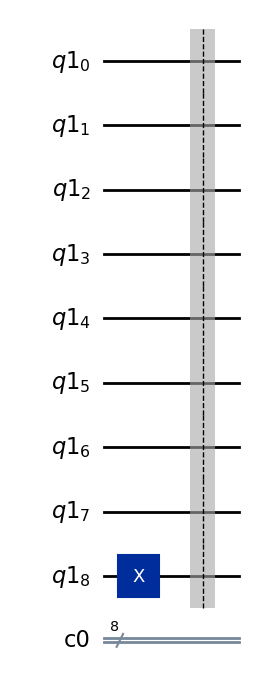

In [6]:
qc.x(q[n])
qc.barrier()
qc.draw('mpl')

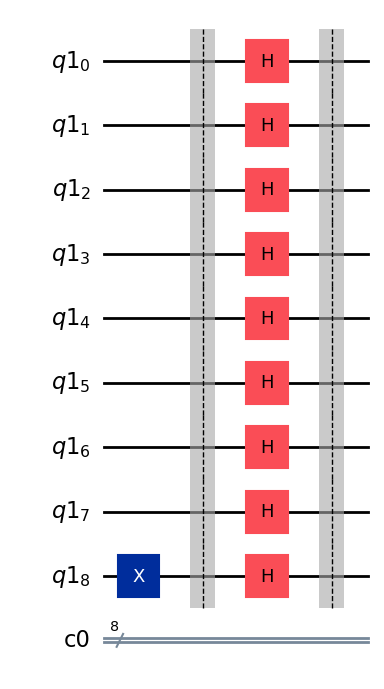

In [7]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

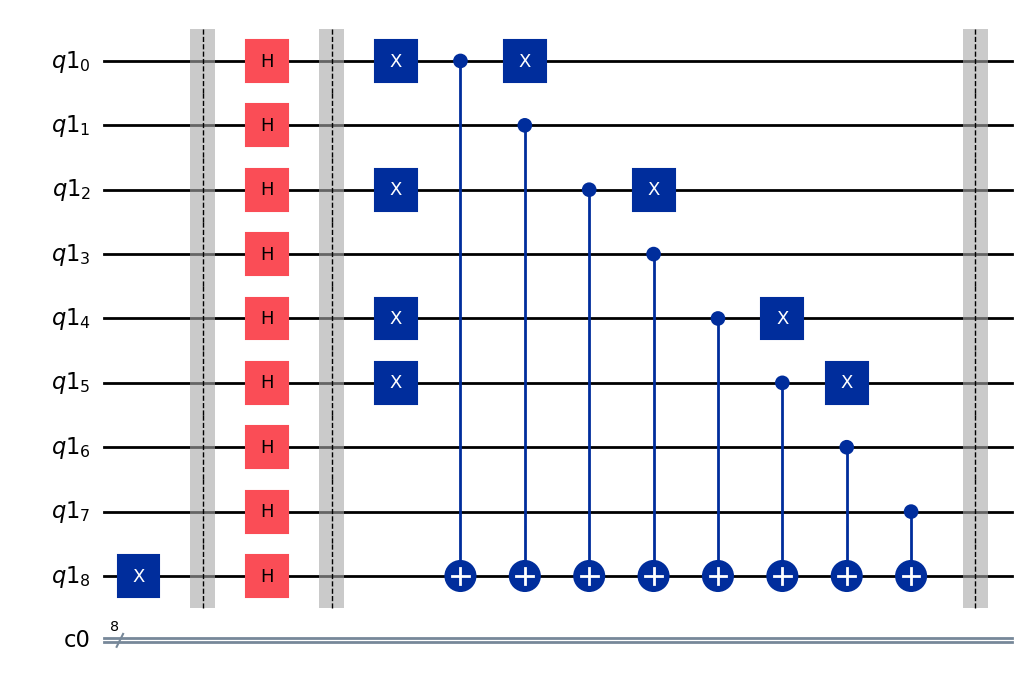

In [8]:
function = 'Balanced'
if function == 'Balanced':
    for i in range(n):
        if bitstring[i]=='1':
            qc.x(q[i])
        qc.cx(q[i],q[n])
        if bitstring[i]=='1':
            qc.x(q[i])
elif function=='Constant':
    qc.i(q[n])
qc.barrier()
qc.draw('mpl')

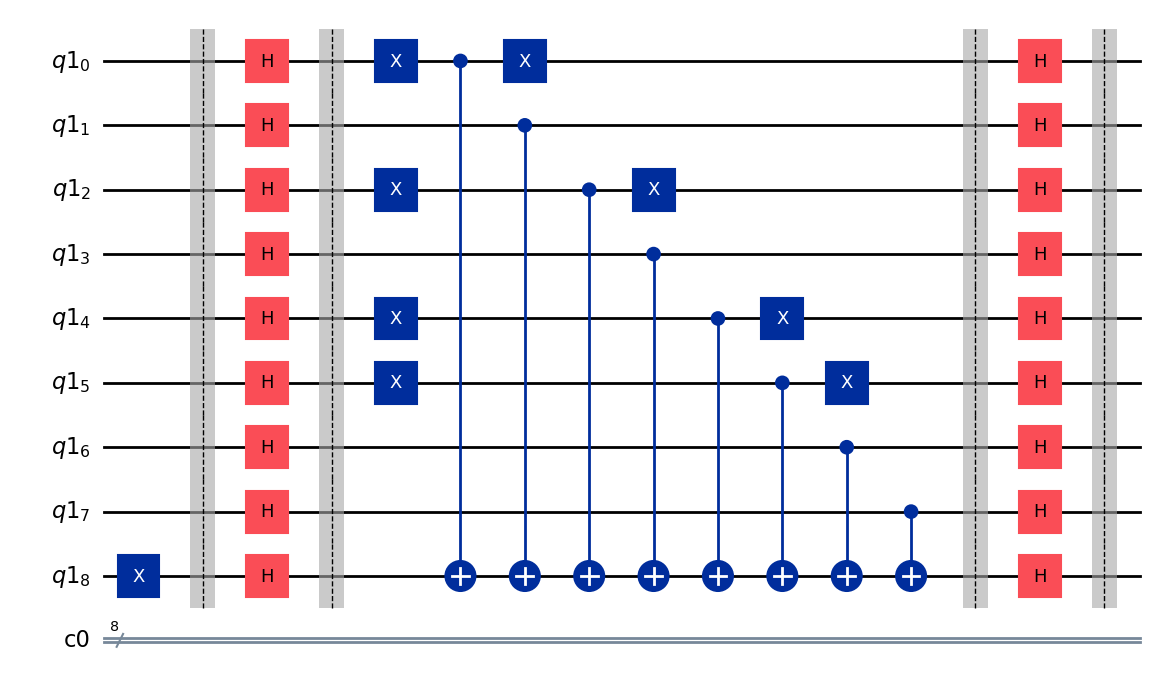

In [9]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

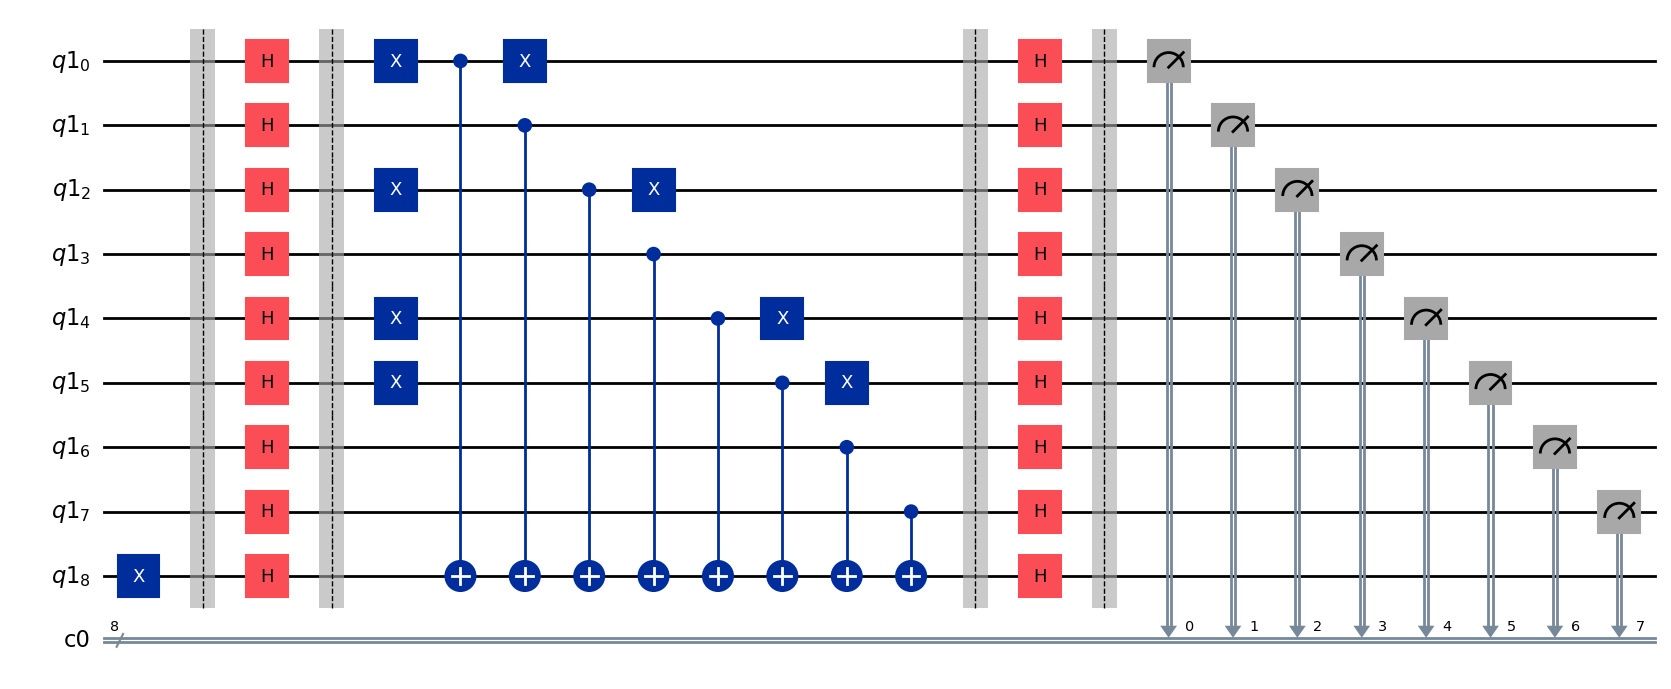

In [10]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'11111111': 1024}


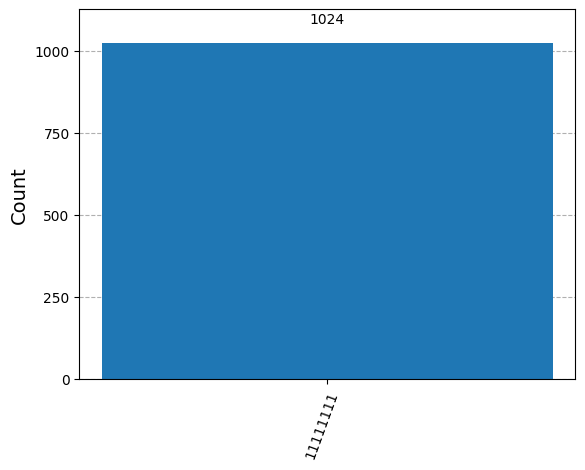

In [11]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [12]:
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

In [13]:
device_simulation= FakeGuadalupeV2()

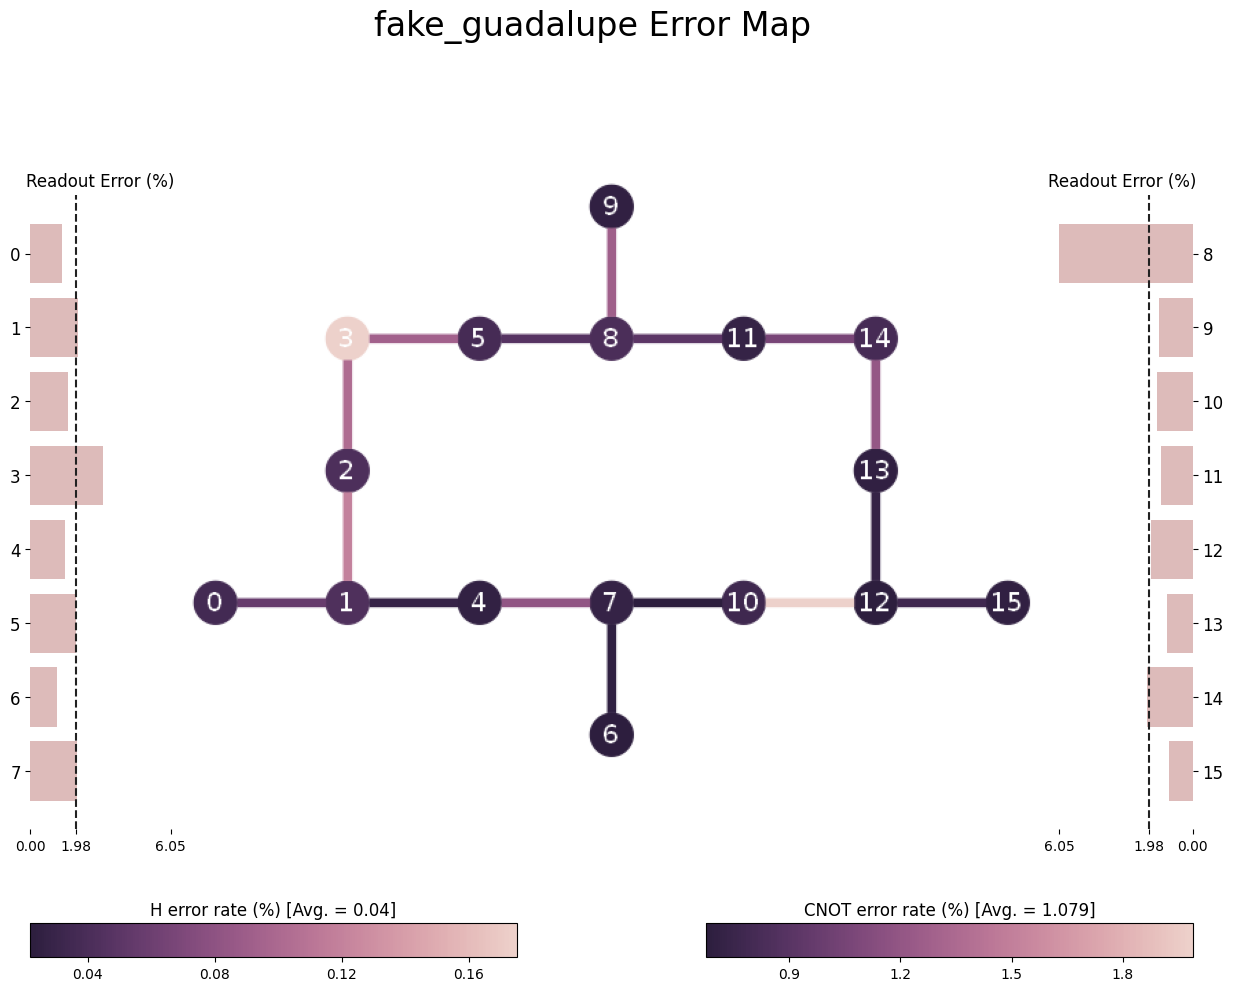

In [14]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulation)

In [15]:
qc2 = transpile(qc, device_simulation)

In [ ]:
qc2.draw('mpl')